# PCS5024 - Statistical Machine Learning
## Bruna de Sá Tavares número USP 11030321

### Estudo do [dataset](https://archive.ics.uci.edu/ml/datasets/Adult)

#### Significado das colunas
* age – idade do individuo
* type_employer – tipo de emprego: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt – Quantidade de pessoas que representa para a pesquisa
* education - grau de formação - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education_num – Maior nível de educação
* marital – Status de casamento - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation – Ocupação - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship – qual seu papel na familia
* race – Raça - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex – Sexo biológico - Male, Female
* capital_gain – Ganho de Capital
* capital_loss – Perda de Capital
* hr_per_week – horas trabalhadas por semana
* country – Pais de origem -United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* Renda Minima - renda mínima 


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors, datasets,metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')

In [11]:
adult = pd.read_csv('adult.csv',names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], sep=r'\s*,\s*',
        engine='python',
        na_values="?")
adult.shape

(32561, 15)

In [12]:
#Mostrar as 3 primeiras linhas da base
df_adult = pd.DataFrame(adult)
df_adult.head(3)                     

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [13]:
adult_test = pd.read_csv('adult_test.csv',names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], sep=r'\s*,\s*',
        engine='python',
        na_values="?")
adult_test.shape

(16281, 15)

In [14]:
#Mostrar as 3 primeiras linhas da base
df_adult_test = pd.DataFrame(adult_test)
df_adult_test.head(3)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [15]:
new_adult = adult.dropna()
new_adult.shape

(30162, 15)

In [16]:
new_adult_test = adult_test.dropna()
new_adult_test.shape

(15060, 15)

#### Fazendo uma análise dos dados da base
##### Existe uma correlação entre os dados?

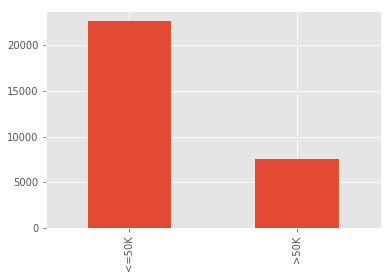

In [9]:
# Quantidade por Target de Renda 
new_adult["Target"].value_counts().plot(kind="bar")
plt.show()

In [29]:
#Analizando relações entre os dados numéricos e não numéricos 
#com o Target

def percent(colum):
    return colum*100//float(colum[-1])

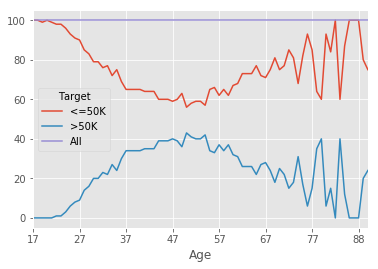

In [98]:
## Idade
targetxage = pd.crosstab(new_adult["Age"],new_adult["Target"],margins=True)
targetxage.apply(percent,axis=1).plot()
plt.show()

A medida que a idade aumenta o número de pessoas com renda >50K aumenta e <=50k diminui até os 57 anos.
Após essa idade a quantidade de dados cai o que influencia no resultado.

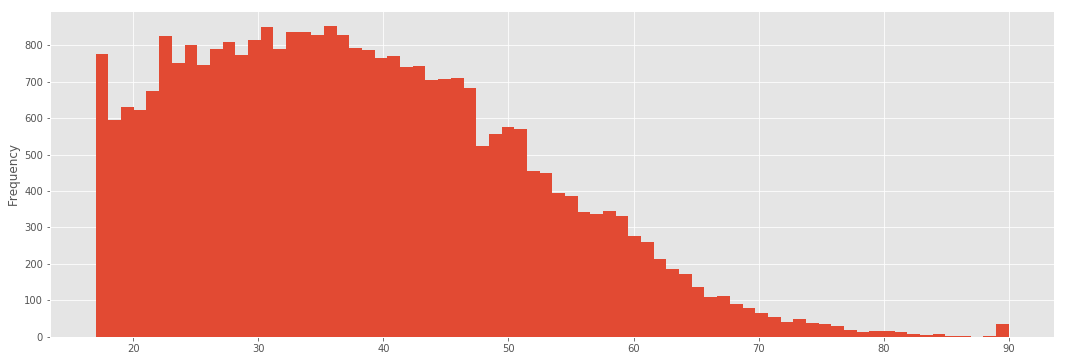

In [99]:
new_adult["Age"].plot(kind="hist",bins=72,figsize=(18,6))
plt.show()

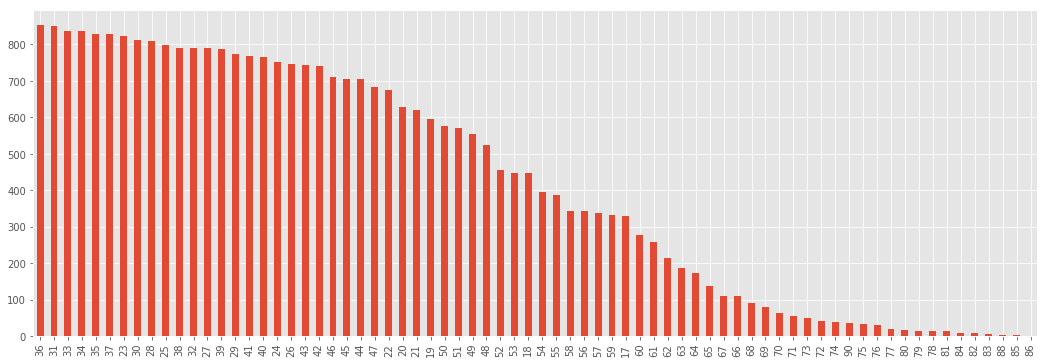

In [100]:
new_adult["Age"].value_counts().plot(kind="bar",figsize=(18,6))
plt.show()

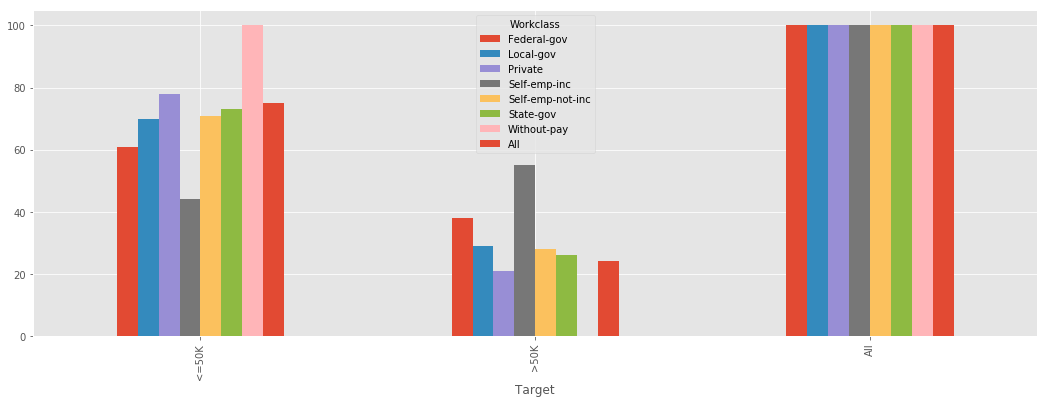

In [110]:
#Tipo de Emprego

targetxworkclass = pd.crosstab(new_adult["Target"],new_adult["Workclass"],margins=True)
targetxworkclass.apply(percent,axis=0).plot(kind="bar",figsize=(18,6))
plt.show()

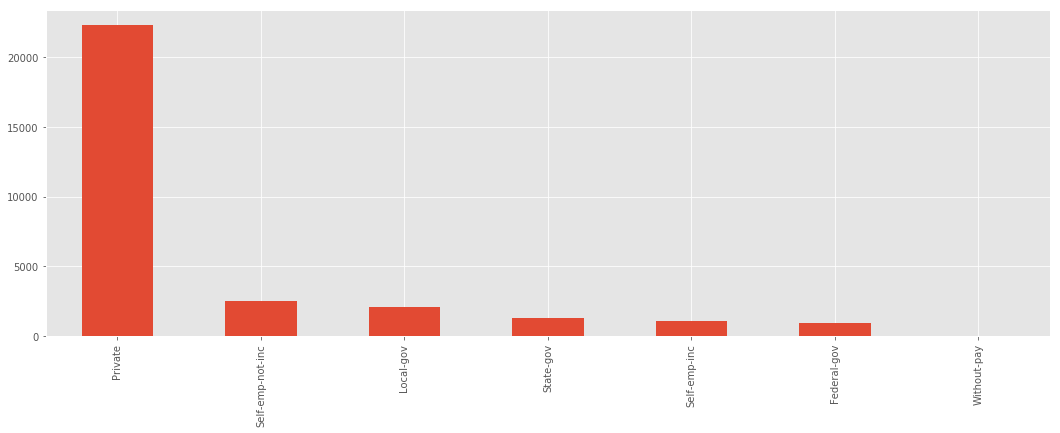

In [20]:
new_adult["Workclass"].value_counts().plot(kind="bar",figsize=(18,6))
plt.show()

Devido a quantidade de dados para os tipos emprego serem quase todas iguais é claro que essa feature influencia na renda.

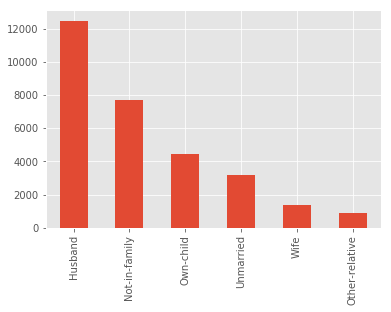

In [114]:
#Distribuição das relações 
new_adult["Relationship"].value_counts().plot(kind="bar")
plt.show()

In [104]:
targetxrelationship = pd.crosstab(new_adult["Target"],new_adult["Relationship"],margins=True)
targetxrelationship.apply(percent,axis=0)

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
Target,,,,,,,
<=50K,54.0,89.0,96.0,98.0,93.0,50.0,75.0
>50K,45.0,10.0,3.0,1.0,6.0,49.0,24.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0


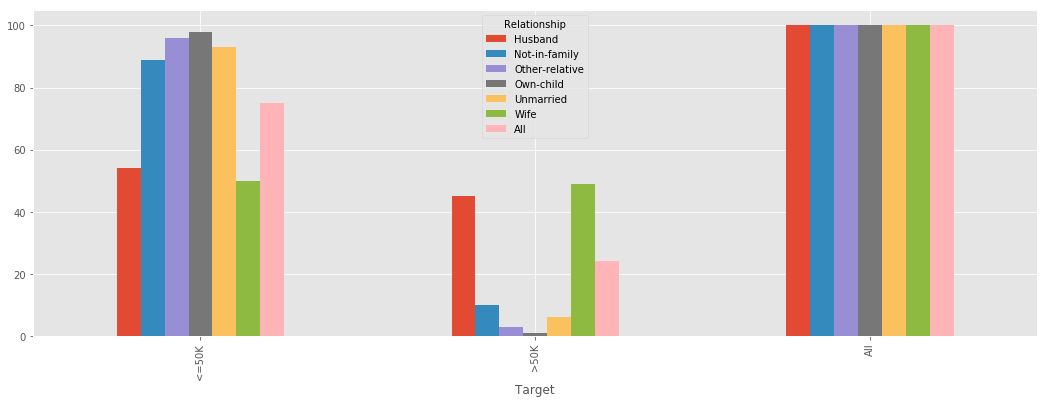

In [107]:
#relations=["Wife", "Husband", "Not-in-family", "Unmarried", "Other-relative", "Own-child"]
#perc=["47", "44", "10", "6", "3", "1"]
#no_number += relations
#number += perc

targetxrelationship.apply(percent,axis=0).plot(kind="bar",figsize=(18,6))
plt.show()

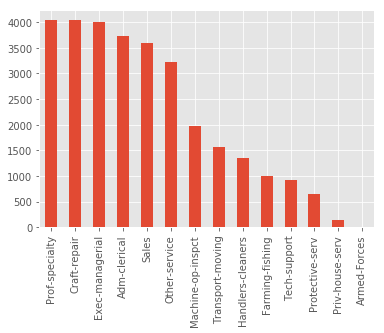

In [108]:
#Ocupação 
new_adult["Occupation"].value_counts().plot(kind="bar")
plt.show()

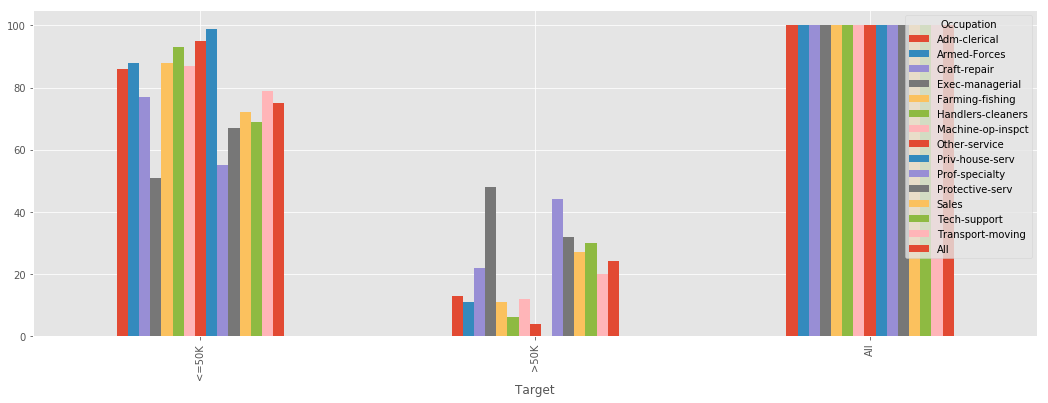

In [116]:
targetxoccupation = pd.crosstab(new_adult["Target"],new_adult["Occupation"],margins=True)
targetxoccupation.apply(percent,axis=0).plot(kind="bar",figsize=(18,6))
plt.show()

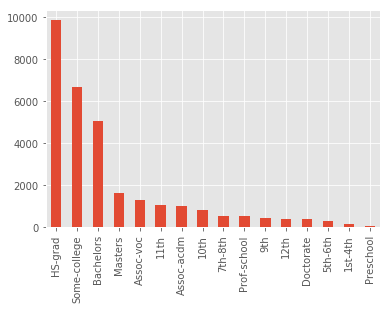

In [109]:
#Grau de formação
new_adult["Education"].value_counts().plot(kind="bar")
plt.show()

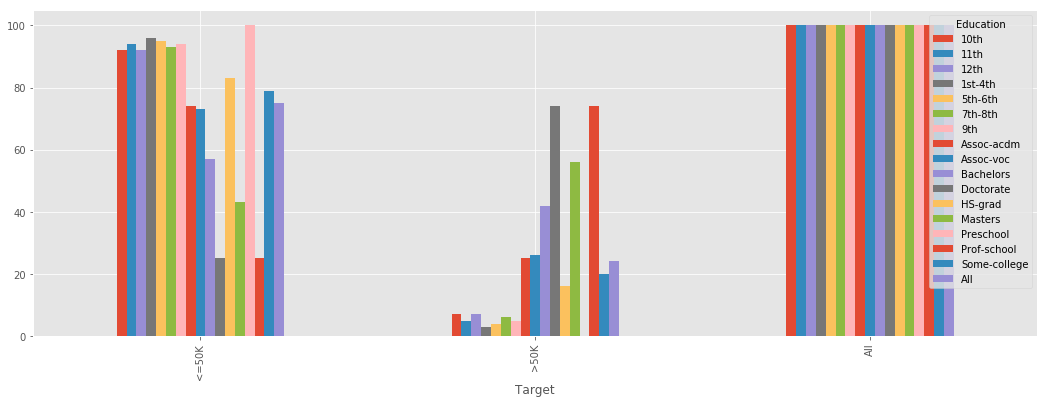

In [119]:
targetxeducation = pd.crosstab(new_adult["Target"],new_adult["Education"],margins=True)
targetxeducation.apply(percent,axis=0).plot(kind="bar",figsize=(18,6))
plt.show()

In [120]:
targetxeducationnum = pd.crosstab(new_adult["Target"],new_adult["Education-Num"],margins=True)
targetxeducationnum.apply(percent,axis=0)

Education-Num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
Target,,,,,,,,,,,,,,,,,
<=50K,100.0,96.0,95.0,93.0,94.0,92.0,94.0,92.0,83.0,79.0,73.0,74.0,57.0,43.0,25.0,25.0,75.0
>50K,-0.0,3.0,4.0,6.0,5.0,7.0,5.0,7.0,16.0,20.0,26.0,25.0,42.0,56.0,74.0,74.0,24.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


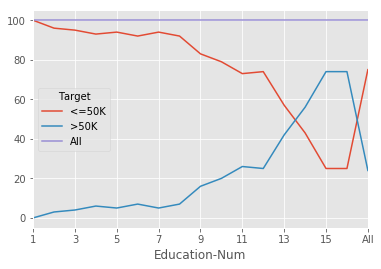

In [121]:
targetxeducationnum = pd.crosstab(new_adult["Education-Num"],new_adult["Target"],margins=True)
targetxeducationnum.apply(percent,axis=1).plot()
plt.show()

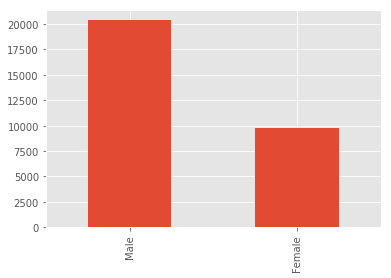

In [123]:
new_adult["Sex"].value_counts().plot(kind="bar")
plt.show()

In [124]:
targetxsex = pd.crosstab(new_adult["Target"], new_adult["Sex"],margins = True)
targetxsex

targetxsex.apply(percent,axis=0)

Sex,Female,Male,All
Target,,,
<=50K,88.0,68.0,75.0
>50K,11.0,31.0,24.0
All,100.0,100.0,100.0


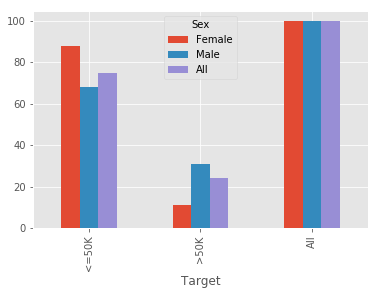

In [125]:
no_number = ["Male","Female"]
number = [3,1]
targetxsex.apply(percent,axis=0).plot(kind="bar")
plt.show()

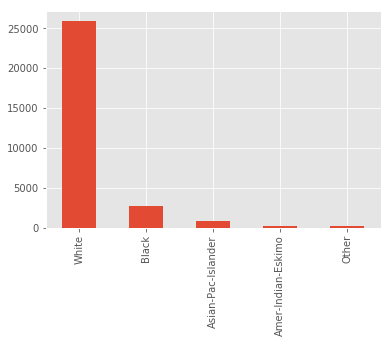

In [128]:
new_adult["Race"].value_counts().plot(kind="bar")
plt.show()

In [33]:
targetxrace = pd.crosstab(new_adult["Target"],new_adult["Race"],margins=True)
targetxrace.apply(percent,axis=0)

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Target,,,,,,
<=50K,88.0,72.0,87.0,90.0,73.0,75.0
>50K,11.0,27.0,12.0,9.0,26.0,24.0
All,100.0,100.0,100.0,100.0,100.0,100.0


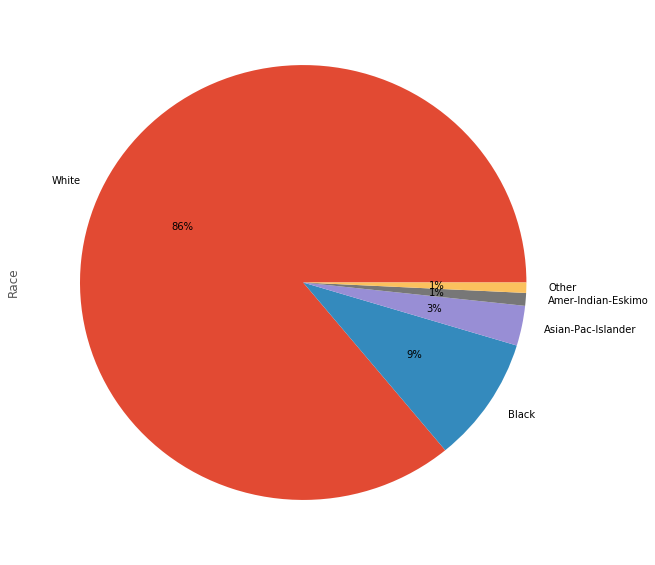

In [23]:
new_adult["Race"].value_counts().plot(kind="pie",figsize=(10,10),autopct='%1.0f%%')
plt.show()

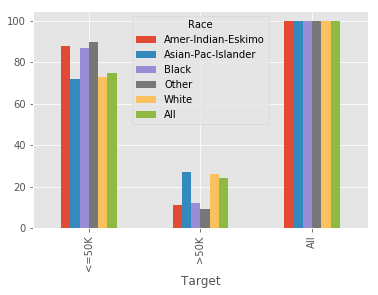

In [34]:
races=["Asian-Pac-Islander","White","Black","Amer-Indian-Eskimo","Other"]
perc=["26", "25", "12", "11","9"]
#no_number += races
#number += perc

targetxrace.apply(percent,axis=0).plot(kind="bar")
plt.show()

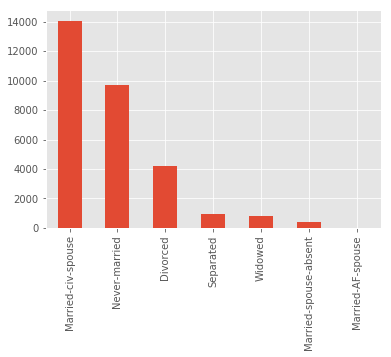

In [31]:
new_adult["Martial Status"].value_counts().plot(kind="bar")
plt.show()

In [35]:
targetxmartialstatus = pd.crosstab(new_adult["Target"],new_adult["Martial Status"],margins=True)
targetxmartialstatus.apply(percent,axis=0)

Martial Status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
Target,,,,,,,,
<=50K,89.0,52.0,54.0,91.0,95.0,92.0,90.0,75.0
>50K,10.0,47.0,45.0,8.0,4.0,7.0,9.0,24.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


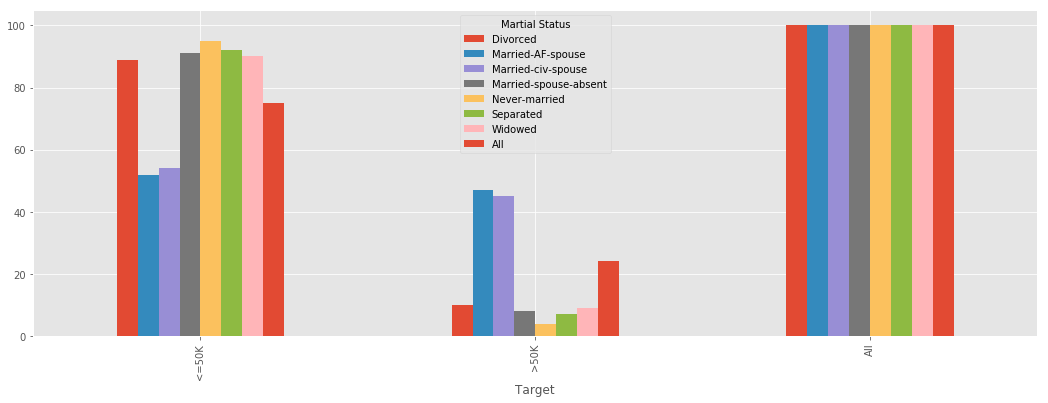

In [38]:
#status=["Married-AF-spouse", "Married-civ-spouse", "Divorced", "Married-spouse-absent", "Widowed","Separated", "Never-married"]
#perc=["44", "43", "10", "8", "8", "6", "4"]
#no_number += status
#number += perc

targetxmartialstatus.apply(percent,axis=0).plot(kind="bar",figsize=(18,6))
plt.show()

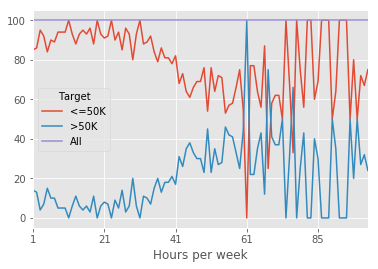

In [135]:
targetxworkhours = pd.crosstab(new_adult["Hours per week"],new_adult["Target"],margins=True)
targetxworkhours.apply(percent,axis=1).plot()
plt.show()

In [39]:
occupation = ["Adm-clerical","Armed-Forces","Craft-repair","Exec-managerial","Farming-fishing","Handlers-cleaners",
              "Machine-op-inspct","Other-service","Priv-house-serv","Prof-specialty","Protective-serv","Sales",
              "Tech-support","Transport-moving"]
perc = ["13","11","22","48","11","6","12","4","0","44","32","26","30","20"]
no_number+=occupation
number+=perc

NameError: name 'no_number' is not defined

In [137]:
work=["Self-emp-inc", "Federal-gov", "Local-gov", "Self-emp-not-inc", "State-gov", "Private", "Without-pay", "Never-worked"]
perc=["55", "38", "29", "28", "27", "21", "0", "0"]
no_number += work
number += perc

0.83402957363570052

array(['<=50K', '>50K', '<=50K', ..., '>50K', '<=50K', '>50K'], dtype=object)

             precision    recall  f1-score   support

      <=50K       0.00      0.00      0.00         0
     <=50K.       0.00      0.00      0.00     11360
       >50K       0.00      0.00      0.00         0
      >50K.       0.00      0.00      0.00      3700

avg / total       0.00      0.00      0.00     15060



C:\Users\bruna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bruna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([ 0.83294664,  0.82764335,  0.82234007,  0.82863772,  0.83222812,
        0.8352122 ,  0.8229443 ,  0.83454907,  0.8318408 ,  0.8318408 ])

In [185]:
knn26.fit(X_train, Y_train)
y_expect = Y_test
y_pred = knn26.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'], dtype=object)

In [168]:
accuracy26 = knn26.score(X_train,Y_train)
accuracy26

0.84208606856309265

In [191]:
#Esta função substitui um dado não numérico por 
#um número relacionado com a porcentagem de 
#pessoas que apresentam aquele dado
# e a característica ">50k"

def num_func(label):
    for i in range(len(number)):
        if label == no_number[i]:
            return number[i]
    return label

In [182]:
new_adult["Sex"] = new_adult["Sex"].apply(num_func)
new_adult["Workclass"] = new_adult["Workclass"].apply(num_func)
new_adult["Martial Status"] = new_adult["Martial Status"].apply(num_func)
new_adult["Relationship"] = new_adult["Relationship"].apply(num_func)
new_adult["Occupation"] = new_adult["Occupation"].apply(num_func)
new_adult["Race"] = new_adult["Race"].apply(num_func)

C:\Users\bruna\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\bruna\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\bruna\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [160]:
#new_adult